# <center>Assignment 5: Prediction by Regression</center>

### Assignment description

In the file china_gdp.csv you will find historic data about the development of China's gross domestic product (GDP).

Your task is to train a model that fits to the data and use the model for prediction of the GDP values of years 2010, 2020, and 2022.



Please, submit a Python solution and elaborate on the following questions related to it:

What type/s of regression have you applied?

Which were the challenges?

How accurate is your solution?

What else could be done for improvement of the accuracy?



This is a group project.

The solution brings two more study points to your collection.

***

### <center>Getting modules and dataset.</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [2]:
china = pd.read_csv('./data/china_gdp.csv')

In [3]:
# split x and y
X = china.iloc[:, 0:1].values
y = china.iloc[:, 1].values

### <center>Analysing the dataset.</center>

In [4]:
china.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [5]:
china.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [6]:
china.shape

(55, 2)

In [7]:
correlation = china.corr()

<AxesSubplot:>

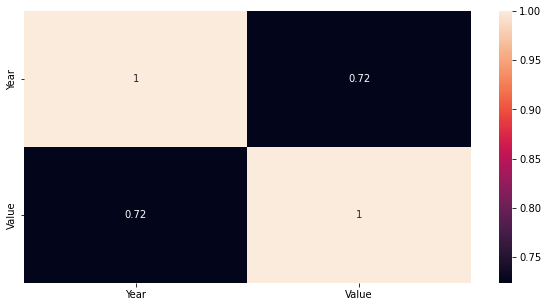

In [8]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(correlation, annot=True)

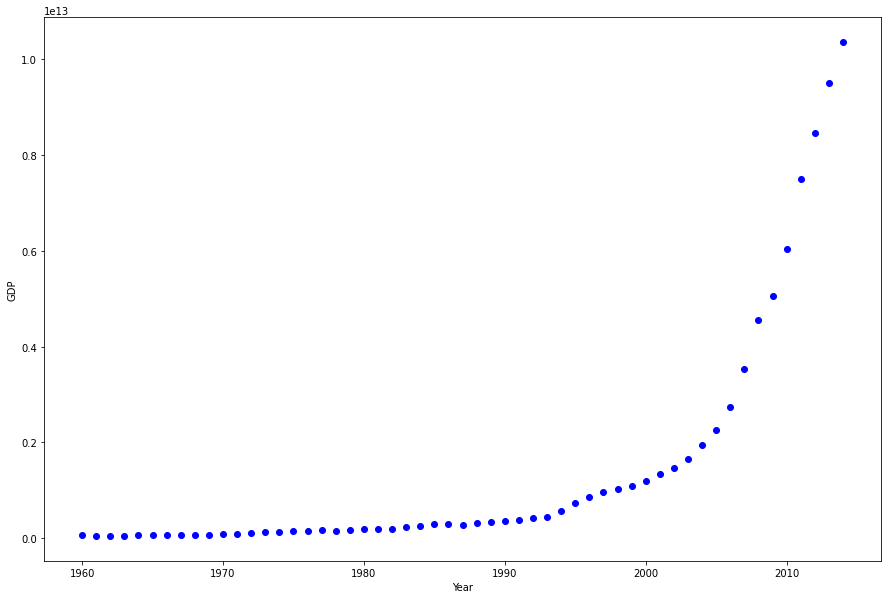

In [9]:
plt.figure(figsize=(15, 10))
plt.xlabel("Year")
plt.ylabel("GDP")
plt.plot(china['Year'], china['Value'], 'bo')

plt.show()

In [10]:
# Methods to print years to show accuracy of the models.

# Convert number into readable value.
def getViewableNumber(num):
    return str(round((num/1000000000), 2)) + ' B'

# Get linear calculated value
def linear_regression_calculator(year):
    linear_fit = np.poly1d(np.polyfit(china['Year'], china['Value'],1))
    return linear_fit(year)

# Get eksponential calculated value
def ekspo_regression_calculator(year):
    return np.exp(ekspo_fit[1]) * np.exp(ekspo_fit[0]*year)

# Get actual value
def actual_gdp(year: float) -> float:
    x = china.loc[china['Year'] == year]
    x = float(x['Value'])
    return x

### <center>Linear regression</center>

Text(0, 0.5, 'Year')

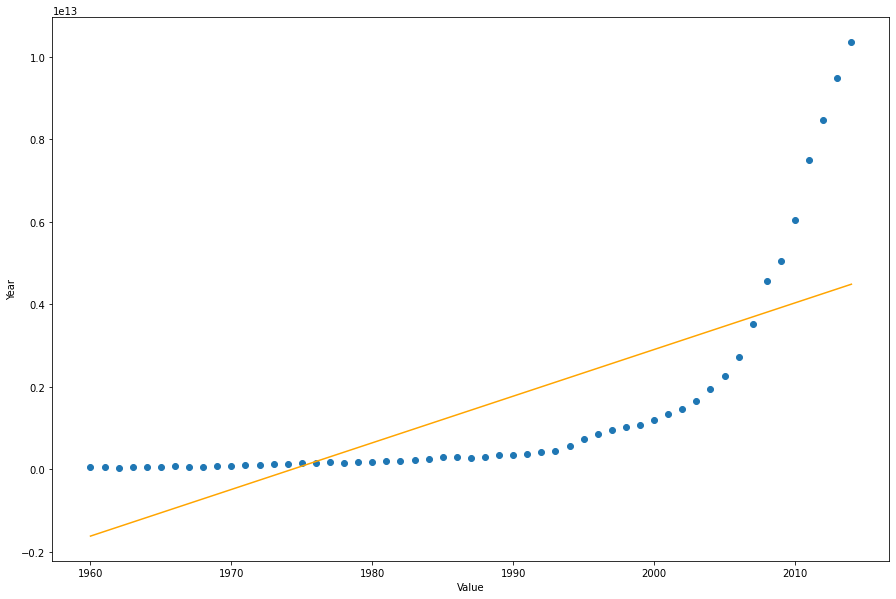

In [11]:
# Create a linear regression model.
regressor = LinearRegression()

#Train the model using the dataset.
regressor.fit(X, y)

values_predicted = regressor.predict(X)

plt.figure(figsize=(15,10))
plt.scatter(X, y,)
plt.plot(X, values_predicted, color='orange')
plt.xlabel('Value')
plt.ylabel('Year')

In [26]:
# Show predicted value by linear regression model:
print('GDP prediction for year 2010: \nPredicted: '+getViewableNumber(linear_regression_calculator(2010)))
print('   Actual: '+getViewableNumber(actual_gdp(2010)))
print('Diviation: '+getViewableNumber(actual_gdp(2010) - linear_regression_calculator(2010)))
print('\nGDP prediction for year 2020: '+getViewableNumber(linear_regression_calculator(2020)))
print('GDP prediction for year 2022: '+getViewableNumber(linear_regression_calculator(2022)))

GDP prediction for year 2010: 
Predicted: 4035.11 B
   Actual: 6039.66 B
Diviation: 2004.54 B

GDP prediction for year 2020: 5164.71 B
GDP prediction for year 2022: 5390.63 B


In [13]:
print("Linear regression accuracy\n")
print("Mean absolute error =", round(mt.mean_absolute_error(y, values_predicted), 2))
print("Mean squared error =", round(mt.mean_squared_error(y, values_predicted), 2))
print("Median absolute error =", round(mt.median_absolute_error(y, values_predicted), 2))
print("Explain variance score =", round(mt.explained_variance_score(y, values_predicted), 2))
print("R2 score =", round(mt.r2_score(y, values_predicted), 2))
print("Accuracy =", int(round(mt.explained_variance_score(y, values_predicted), 2)*100), "%" )

Linear regression accuracy

Mean absolute error = 1310712467848.1
Mean squared error = 2.921285914150742e+24
Median absolute error = 1201717502335.85
Explain variance score = 0.52
R2 score = 0.52
Accuracy = 52 %


#### <span style="color: green"> The linear regression model is only <u>52 %</u> accurate.</span>
#### <span style="color: green"> This could be more precise with a exponential regression model...</span>
***

### <center>Exponential regression</center>

Text(0, 0.5, 'Total GDP')

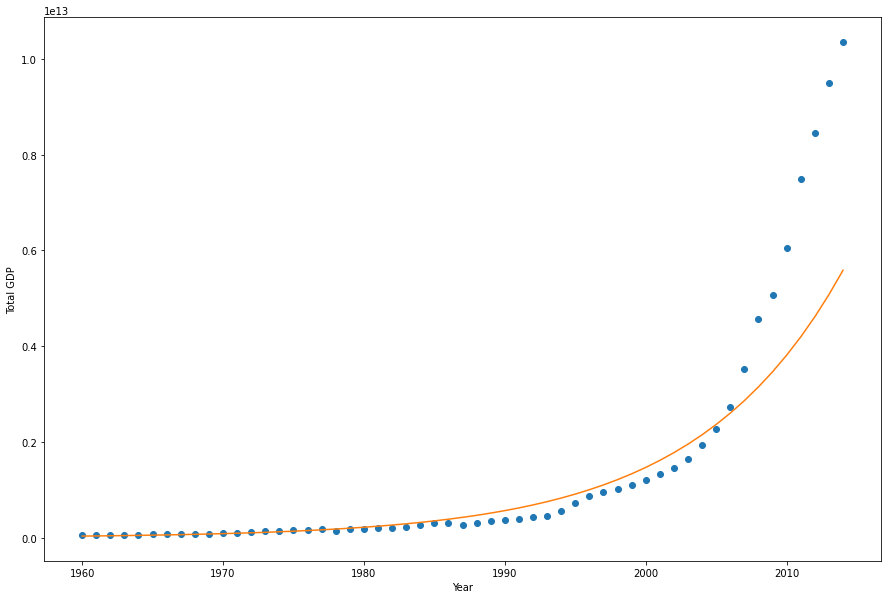

In [14]:
# Create a exponential regression model

ekspo_fit = np.polyfit(china['Year'], np.log(china['Value']), 1)

y_predicted = np.exp(ekspo_fit[1]) * np.exp(ekspo_fit[0]*china['Year'])
plt.figure(figsize=(15, 10))
plt.plot(china['Year'], china['Value'], "o")
plt.plot(china['Year'], y_predicted)
plt.xlabel('Year')
plt.ylabel('Total GDP')

In [15]:
# Show predicted value by exponential regression model:

print('GDP prediction for year 2010: \n\n    Predicted: '+getViewableNumber(ekspo_regression_calculator(2010)))
print('       Actual: '+getViewableNumber(actual_gdp(2010)))
print('    Diviation: '+getViewableNumber(actual_gdp(2010) - ekspo_regression_calculator(2010)))
print('\nGDP prediction for year 2020: '+getViewableNumber(ekspo_regression_calculator(2020)))
print('GDP prediction for year 2022: '+getViewableNumber(ekspo_regression_calculator(2022)))

GDP prediction for year 2010: 

    Predicted: 3811.64 B
       Actual: 6039.66 B
    Diviation: 2228.02 B

GDP prediction for year 2020: 9906.9 B
GDP prediction for year 2022: 11992.32 B


***

In [16]:
print("Exponential regression accuracy\n")
print("Mean absolute error =", round(mt.mean_absolute_error(y, y_predicted), 2))
print("Mean squared error =", round(mt.mean_squared_error(y, y_predicted), 2))
print("Median absolute error =", round(mt.median_absolute_error(y, y_predicted), 2))
print("Explain variance score =", round(mt.explained_variance_score(y, y_predicted), 2))
print("R2 score =", round(mt.r2_score(y, y_predicted), 2))
print("Accuracy =", int(round(mt.explained_variance_score(y, y_predicted), 2)*100), "%" )

Exponential regression accuracy

Mean absolute error = 493001781028.9
Mean squared error = 1.4337833314222322e+24
Median absolute error = 95682808019.09
Explain variance score = 0.78
R2 score = 0.77
Accuracy = 78 %


#### <span style="color: green"> The exponential regression model is <u>78 %</u> accurate.</span>
#### <span style="color: green"> This is alot better compared to the linear model, but could perhaps be even better with an polynomial regression model...</span>
***

### <center>Polynominal regression</center>

In [17]:
poly_reg = PolynomialFeatures(degree=3)
poly_X = poly_reg.fit_transform(X)

# Creating regression model

poly_regressor = LinearRegression()
poly_regressor.fit(poly_X, y)

LinearRegression()

In [18]:
# Apply model to new training
y_predict = poly_regressor.predict(poly_X)


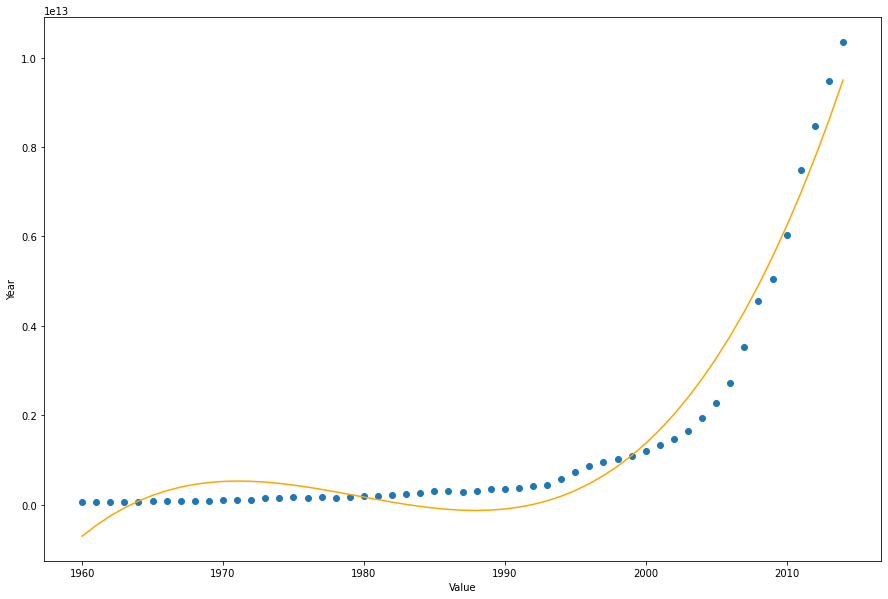

In [19]:
# Visualizing the Polymonial Regression results

plt.figure(figsize=(15,10))
plt.scatter(X, y)
plt.plot(X, y_predict, color='orange')
plt.xlabel('Value')
plt.ylabel('Year')

plt.show()

In [20]:
# Get polynomial calculated value
def poly_predict_value(year):
    y_pre_val = poly_regressor.predict(poly_reg.fit_transform([[year]]))
    return float(y_pre_val)

In [21]:
# Show predicted value by exponential regression model:
print('GDP prediction for year 2010: \n\n    Predicted: '+getViewableNumber(poly_predict_value(2010)))
print('       Actual: '+getViewableNumber(actual_gdp(2010)))
print('    Diviation: '+getViewableNumber(poly_predict_value(2010) - actual_gdp(2010)))
print('\nGDP prediction for year 2020: '+getViewableNumber(poly_predict_value(2020)))
print('GDP prediction for year 2022: '+getViewableNumber(poly_predict_value(2022)))

GDP prediction for year 2010: 

    Predicted: 6233.84 B
       Actual: 6039.66 B
    Diviation: 194.18 B

GDP prediction for year 2020: 16145.89 B
GDP prediction for year 2022: 18879.82 B


In [22]:
print("Polynominal regression accuracy\n")
print("Mean absolute error =", round(mt.mean_absolute_error(y, y_predict), 2))
print("Mean squared error =", round(mt.mean_squared_error(y, y_predict), 2))
print("Median absolute error =", round(mt.median_absolute_error(y, y_predict), 2))
print("Explain variance score =", round(mt.explained_variance_score(y, y_predict), 2))
print("R2 score =", round(mt.r2_score(y, y_predict), 2))
print("Accuracy =", int(round(mt.explained_variance_score(y, y_predict), 2)*100), "%" )

Polynominal regression accuracy

Mean absolute error = 396603064119.15
Mean squared error = 2.1779364875071557e+23
Median absolute error = 381553507803.69
Explain variance score = 0.96
R2 score = 0.96
Accuracy = 96 %


#### <span style="color: green"> The polynomial regression model has a <u>96 %</u> accuracy.</span>
#### <span style="color: green"> This model has a very high accuracy, which gives us the best chances of being precise on future GDP Values for China.</span>
***

## The results for the different types of regressions - shows that the polynomial regression model was the best approach for this assignment.

The linear regression model was <u>52 %</u> accurate. 
<br>The exponential regression model was <u>78 %</u> accurate.
<br>The polynomial regression model was <u>96 %</u> accuracy.
